# Supervised Learning - Foundations Project: ReCell

## Problem Statement

Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Mounting Google Drive to the notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Science and Business Analytics/Supervised Learning - Fundamentals/Project/used_device_data.csv')

## Data Overview

In [ ]:
# Checking the dataset has been loaded properly
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
# Checking the shape of the dataset
data.shape

(3454, 15)



*   The dataset contains information (15 attributes) about 3454 devices (phone/tablet)



In [ ]:
# Checking the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f



*   There are 11 numeric (float and int type) and 4 string (object type) columns in the data
*   The target variable is the normalized used price, which is of float type



In [ ]:
# Statistical summary of the dataset
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


- We can see that the normalized used price for the devices vary between 1.5 and 6.6
- The days used ranges from 91 to 1094
- The release year ranges from 2013 to 2020
- The screen size ranges from 5.1 to 30.7cm
- The top out of 4 OS on which the devices run is Android
- The main camara megapixels ranges from 0.08 to 48.00
- The selfie camara megapixels ranges from 0.0 to 32.0
- The internal memory ranges from 0.01 to 1024 GB
- The batterys capacity ranges from 500 to 9720 mAh





In [ ]:
# Cheching for duplicate values
data.duplicated().sum()

0

- There are no duplicate values in the data

In [ ]:
# Checking for missing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- **Main camara,  selfie camara,  internal memory,  ram,  battery and weight** attributes appear to have missing values

In [ ]:
# creating a copy of the data so the original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

###Univariate Analysis

####Functions

In [ ]:
# creating a function to ilustrate the boxplot and histogram of a single variable together
def histogram_boxplot(data, feature, figsize=(15,10), kde=True, bins=None):
  '''
  Boxplot and histogram combined
  data: dataframe
  feature: dataframe column
  figsize: size of figure
  kde: wheater to show the density curve
  bins: number of bins for histogram
  '''
  f2, (ax_box2, ax_hist2)=plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': (0.25, 0.75)}, figsize=figsize,) # Number of rows of the subplot grid=2, x-axis will be shared among all subplots and creating the 2 subplots
  sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color='green') # Boxplot will be created and a triangle will indicate the mean value of the column
  sns.histplot(data=data, x=feautre, kde=kde, ax=ax_hist2, bins=bins) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2) # For histogram
  ax_hist2.axvline(data[feature].mean(), color='violet', linestyle='--') # Add mean to the histogram
  ax_hist2.axvline(data[feature].median(), color='black', linestyle='-') # Add median to the histogram

In [ ]:
# creating a function to create labeled barplots
def labeled_barplot(data, feature, perc=False, legend=False, n=None):
  '''
  Barplot with percentage at the top
  data: dataframe
  feature: dataframe column
  perc: whether to display percentages instead of count (default is False)
  n: display the top n category levels (default is None, i.e., display all levels)
  '''
  total=len(data[feature]) # Lenght of the column
  count=data[feature].nunique()
  if n is None:
    plt.figure(figsize=(count + 2, 6))
  else:
    plt.figure(figsize=(n +2, 6))

  plt.xticks(rotation=90, fontsize=15)
  ax=sns.countplot(data=data, x=feature, palette='Paired', order=data[feature].value_counts().index[:n],)

  for p in ax.patches:
    if perc == True:
      label = "{:.1f}%".format(100*p.get_height() / total) # Percentage of each class of the category
      x = p.get_x() + p.get_width() / 2  # width of the plot
      y = p.get_height() # height of the plot
      ax.annotate(label, (x,y), ha='center', va='center', size=12, xytext=(0,5), textcoords='offset points',) # annotate the percentage
    else:
      label = p.get_height() #count of each level of the category


  plt.show()


####Screen Size
*   Screen size attribute shows many outliers both to the left and right of the distribution.
*   The median screen size is ~ 13cm



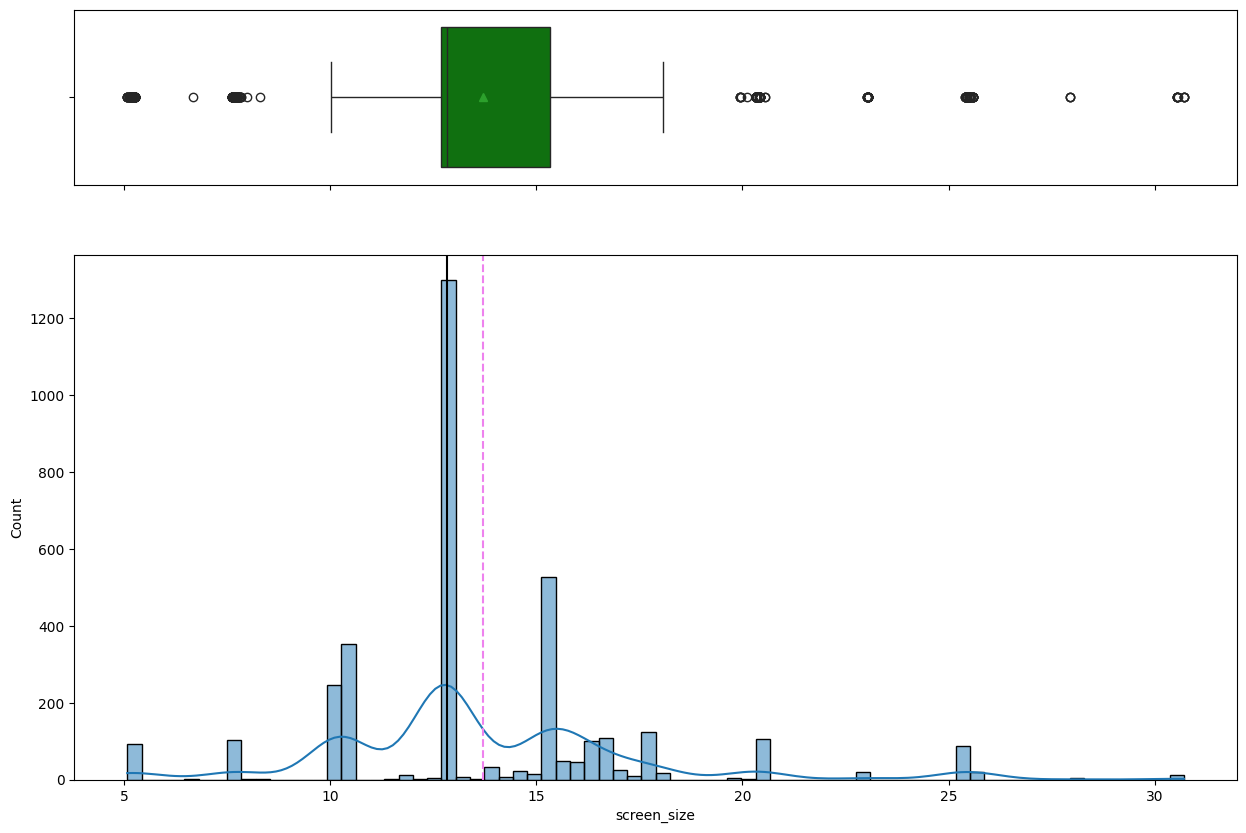

In [ ]:
histogram_boxplot(data, "screen_size")

In [ ]:
data['screen_size'].median()

12.83


####Main Camara
*   The distribution for the main camara megapixels is slightly right-skewed with a median of 8 megamixels
*   The distribution shows some outliers to the right



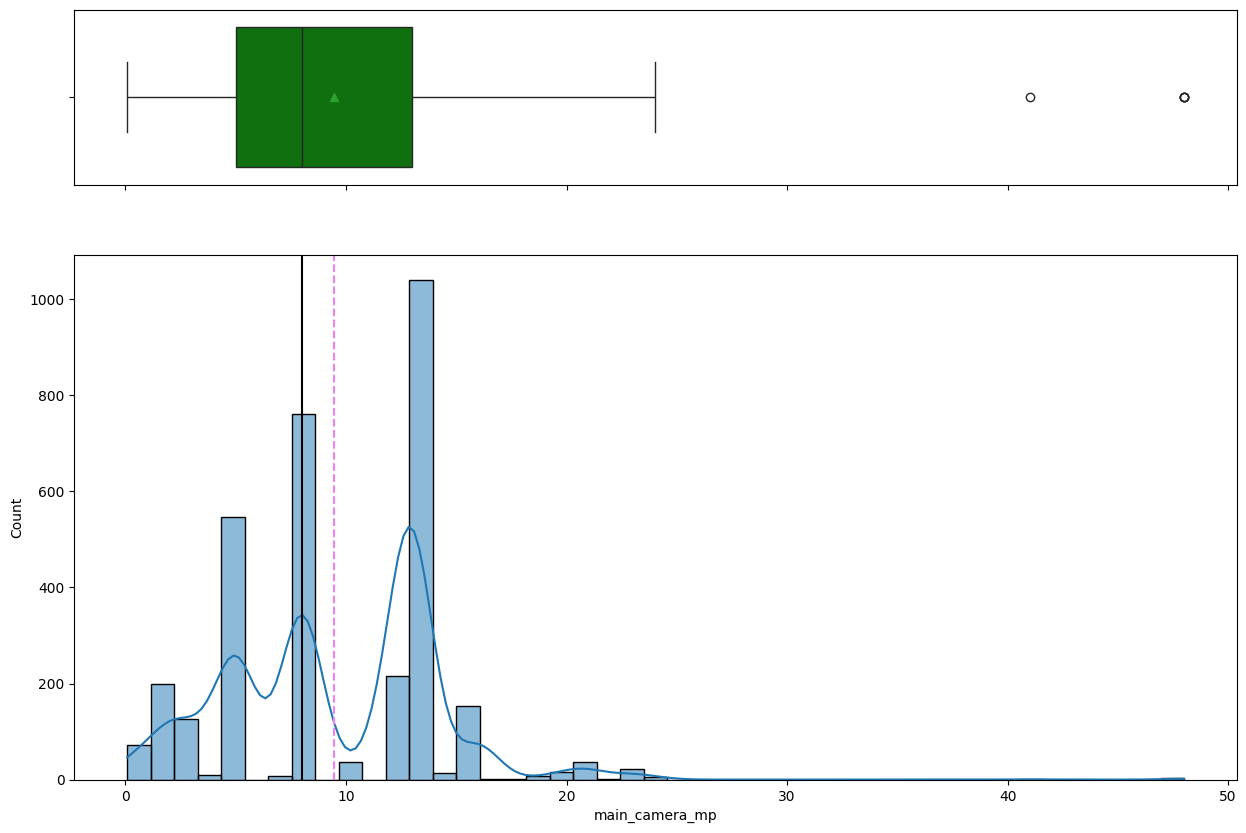

In [ ]:
histogram_boxplot(data, "main_camera_mp")

In [ ]:
data['main_camera_mp'].median()

8.0


####Selfie Camara
*   The distribution for selfie camara in megapixels is slightly right-skewed with most of the devices having less than 10 megapixels
*   There are some outliers present
*   The median is 5 mp



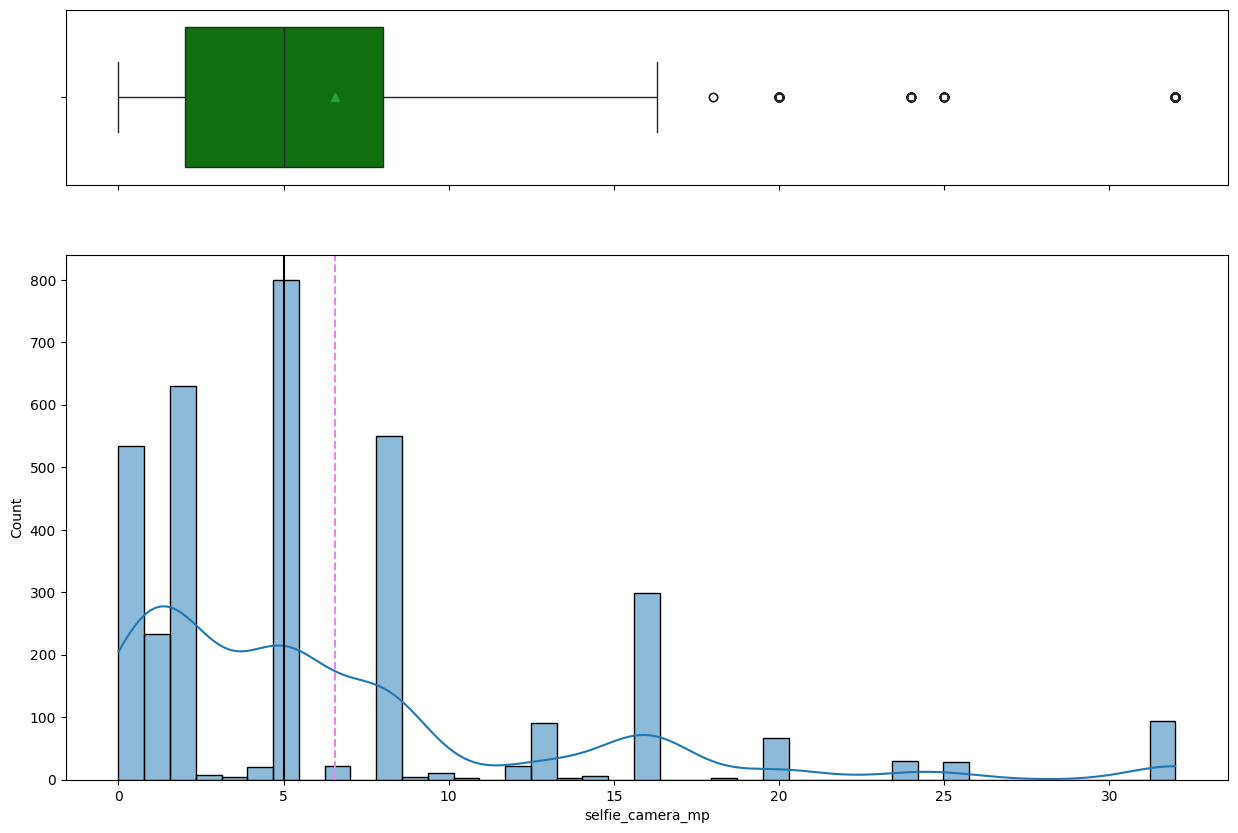

In [ ]:
histogram_boxplot(data, "selfie_camera_mp")


####Internal Memory
*   The distribution for internal memory is heavily right-skewed, and most of the devices have less than 100 GB
*   The median is 32 GB



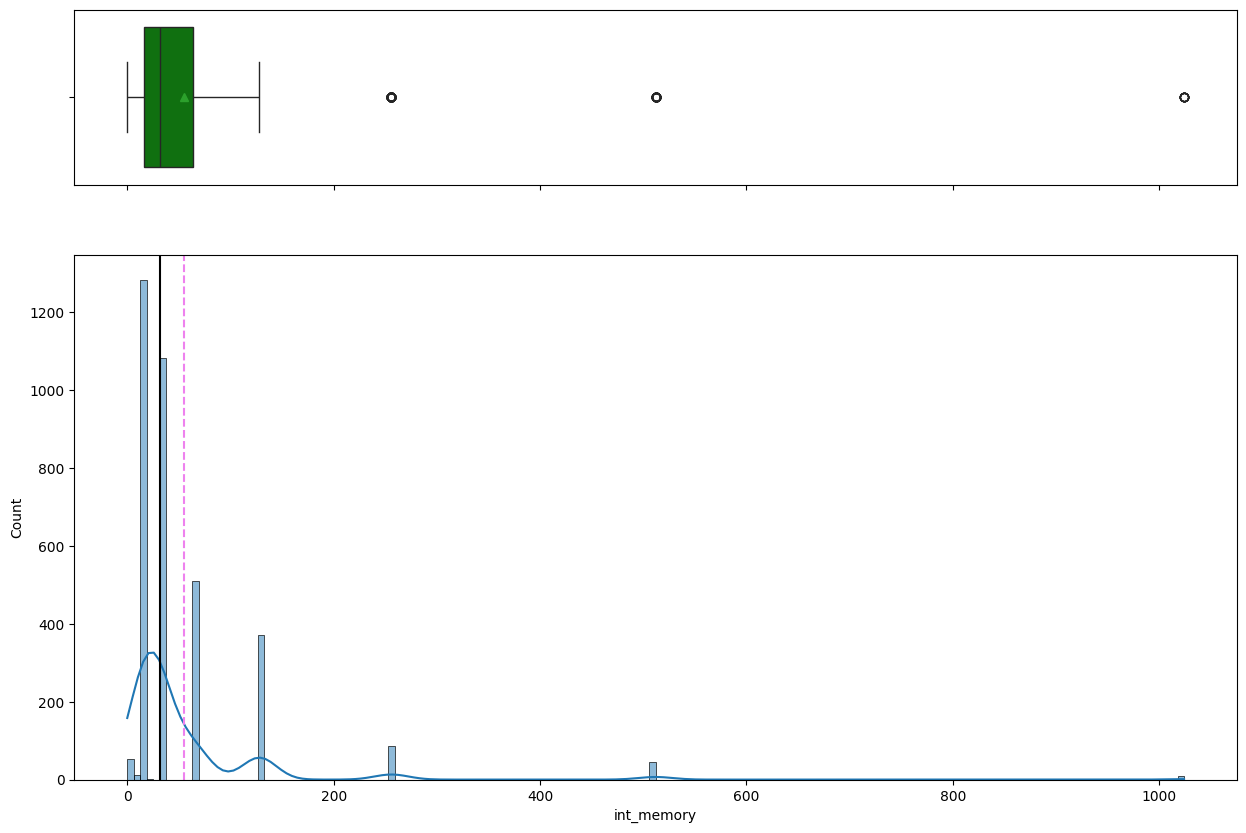

In [ ]:
histogram_boxplot(data, "int_memory")

In [ ]:
data['int_memory'].median()

32.0

####RAM
*   The ram distribution appears to be close to normal with a median of 4 GB
*   There are many outliers on both ends of the distribution




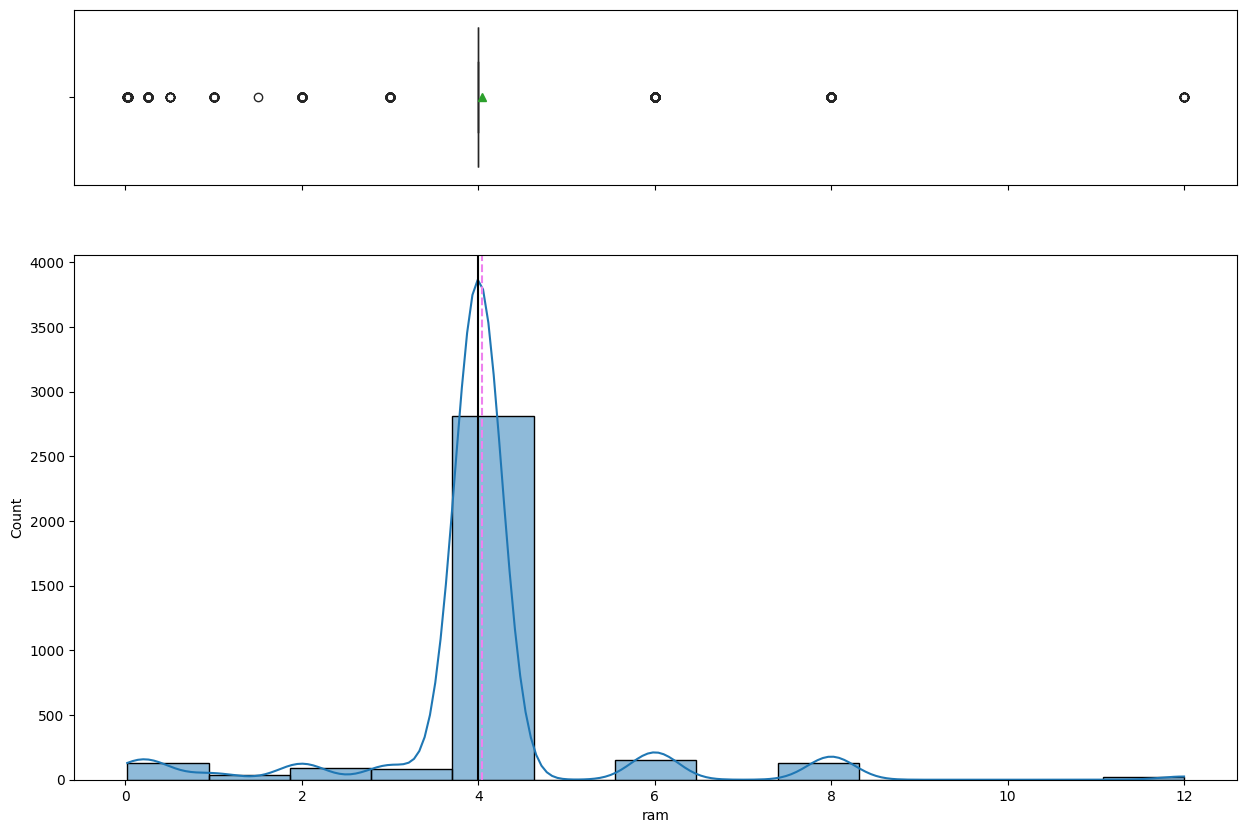

In [ ]:
histogram_boxplot(data, 'ram')


####Battery
*   The battery distribution is slightly right-skewed with some outliers
*   The median for battery is 3000 mAh



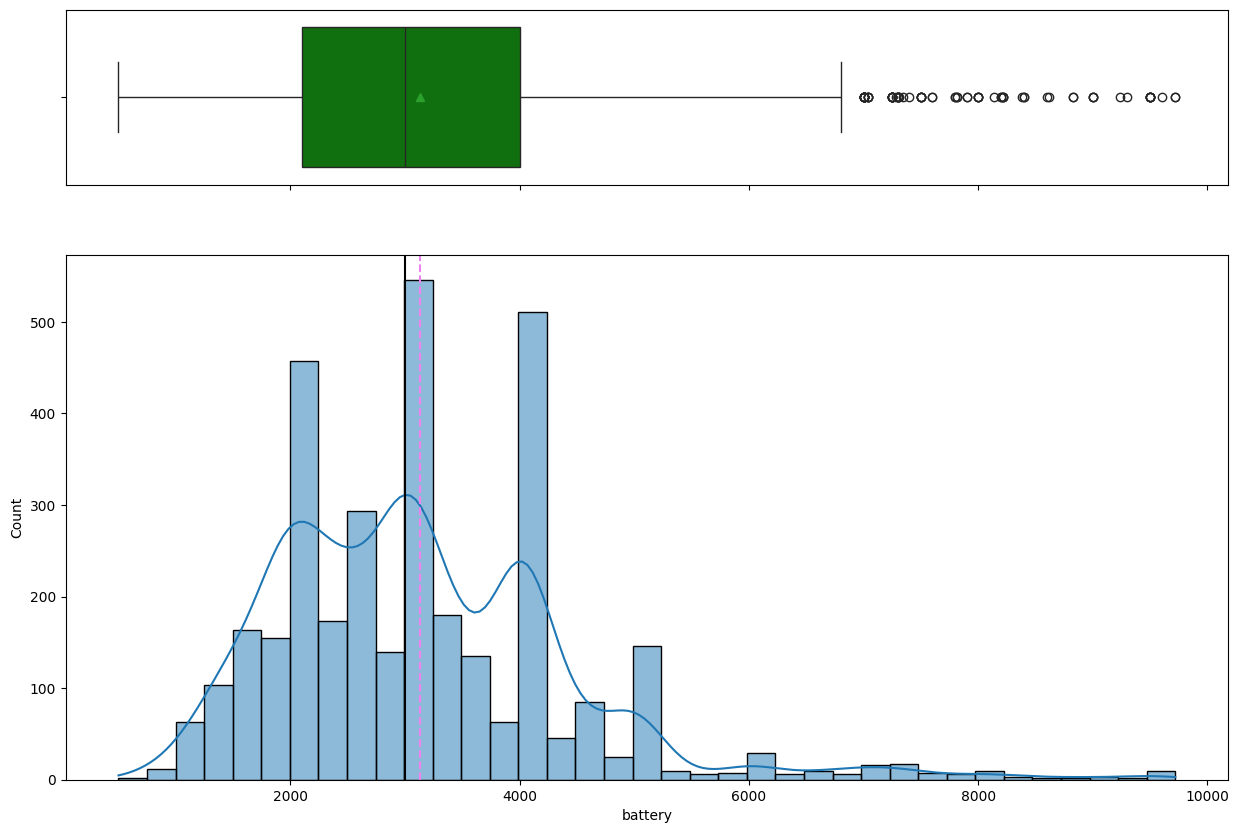

In [ ]:
histogram_boxplot(data, "battery")

In [ ]:
data['battery'].median()

3000.0


####Weight
*   The distribution for the weight of the device is right-skewed with most devices weighing less than 200 grams
* The median for the device weight is 160 gr
*   There appears to be many outliers



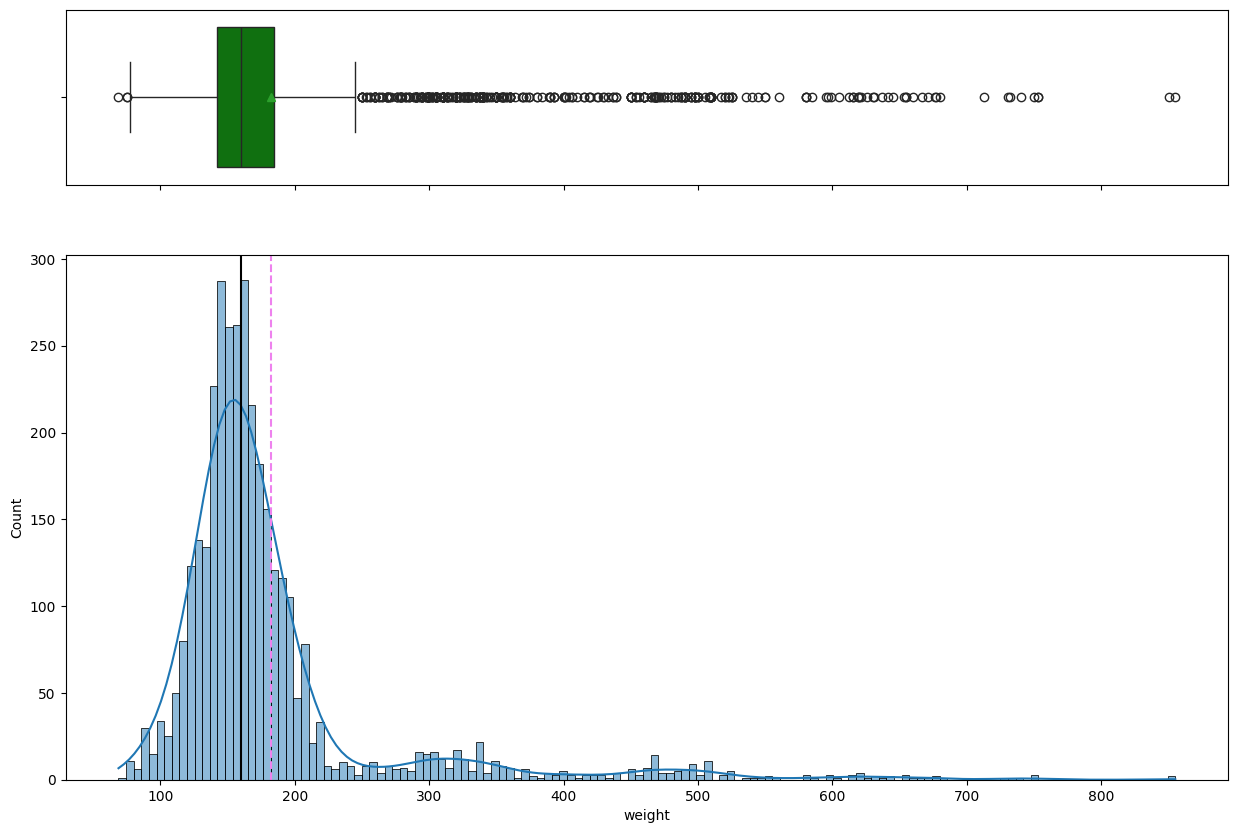

In [ ]:
histogram_boxplot(data, 'weight')

In [ ]:
data['weight'].median()

160.0


####Release Year
*   The distribution of device releases across the years seems to have a balance between uniform and slightly right-skewed, with 2014 standing out as the year with the highest number of device releases compared to other years.



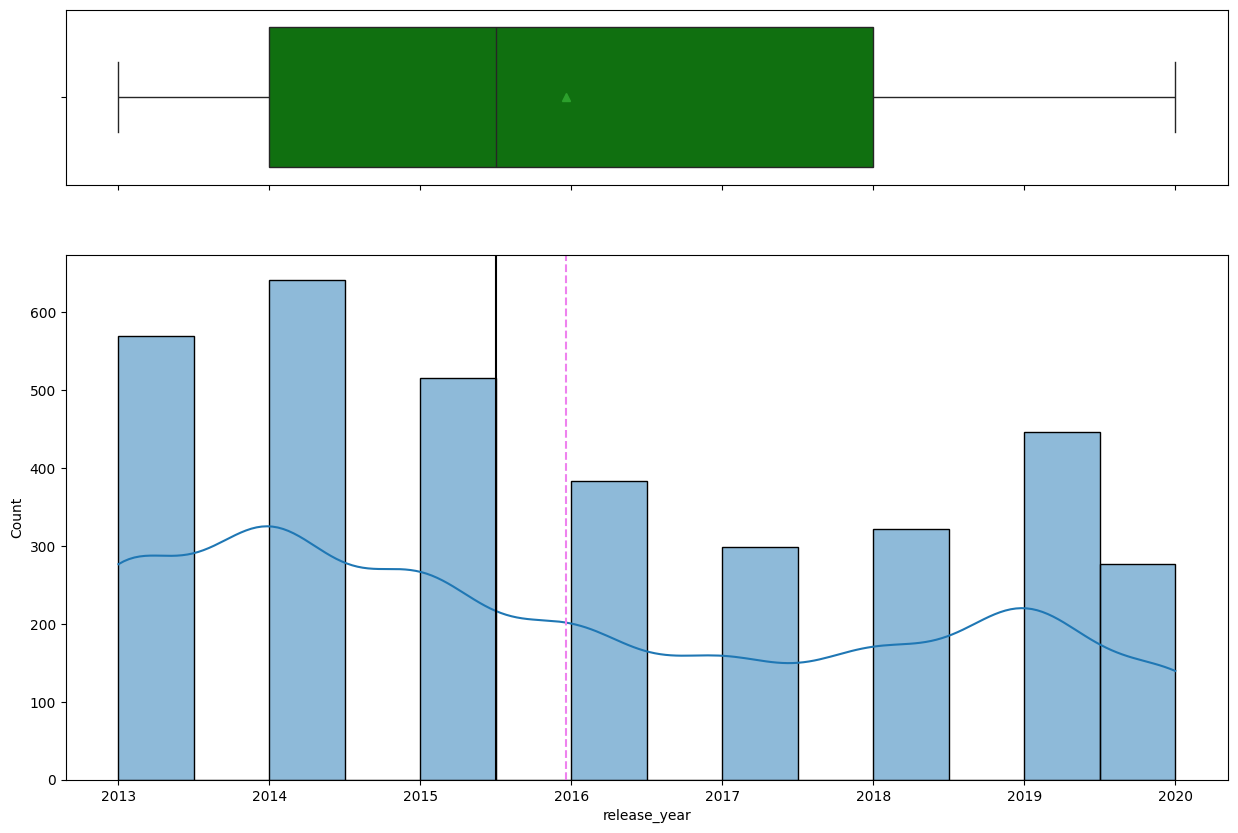

In [ ]:
histogram_boxplot(data, 'release_year')

In [ ]:
data['release_year'].mode()

0    2014
Name: release_year, dtype: int64


####Days Used
*   The "days used" attribute exhibits a slightly left-skewed distribution, indicating that the majority of devices have been used for more than 500 days.
*   The mean for "days used" is 675 days.


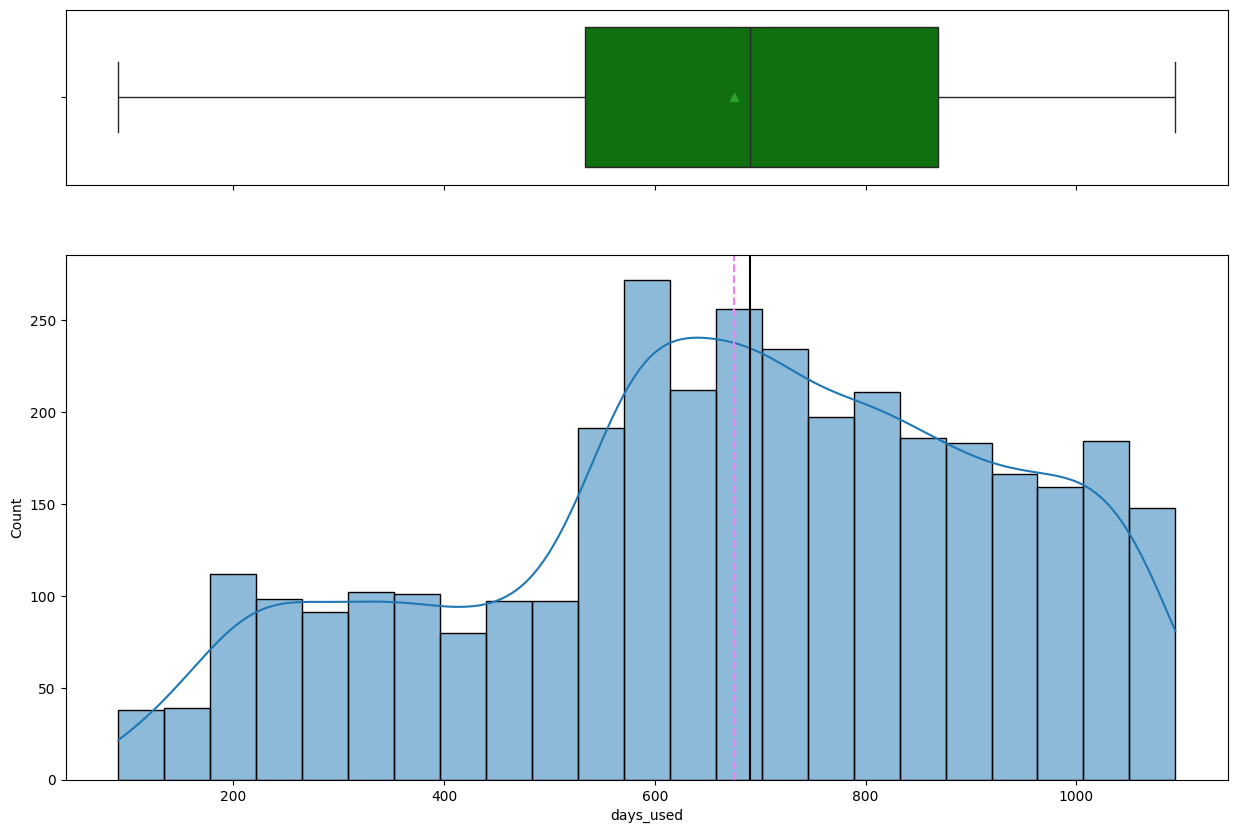

In [ ]:
histogram_boxplot(data, "days_used")

In [ ]:
data['days_used'].mean()

674.8697162709901

####Normalized New Price
- The distribution of 'normalized new price' is close to normal with some outliers on both ends.

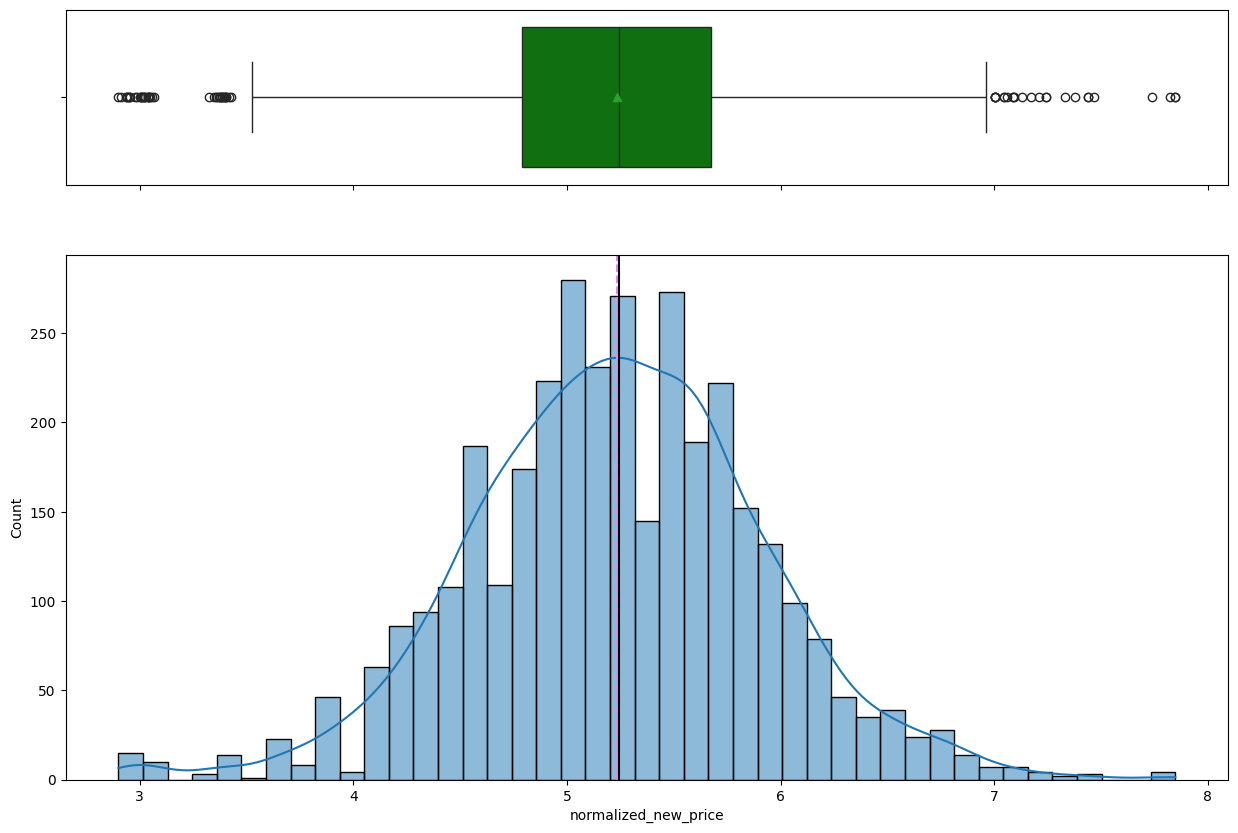

In [ ]:
histogram_boxplot(data, 'normalized_new_price')

####Normalized Used Price
- The distribution of 'normalized used price' is close to normal with a slightly longer tail on the left side.
- There are outliers on both ends of the distribution.

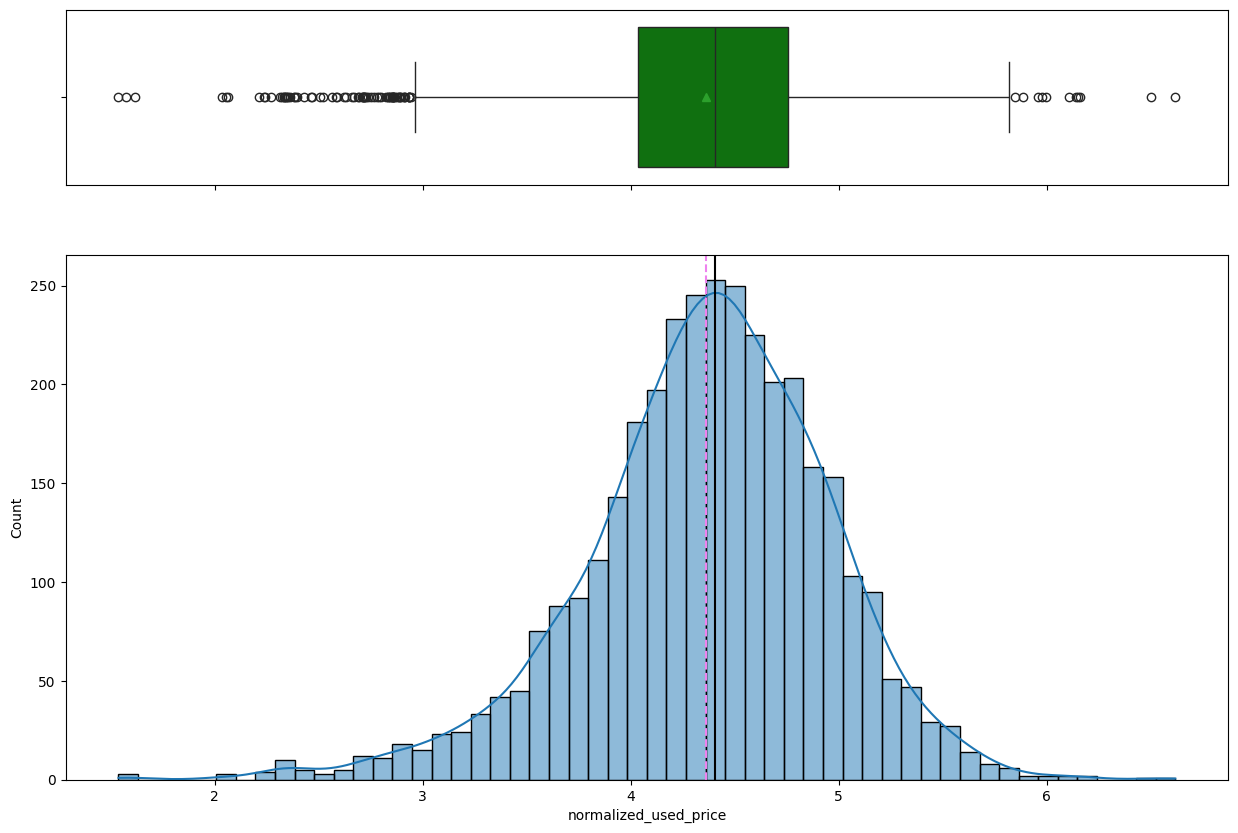

In [ ]:
histogram_boxplot(data, 'normalized_used_price')

####Brand Name
- The most frequent known brand in the dataset is Samsung with a 9.9% followed by Huawei with 7.3%, LG with 5.8% and a gradual decline for other brands.
- There are 33 known brands in the dataset.
- 14.5% of devices have 'others' as their labeled brand.

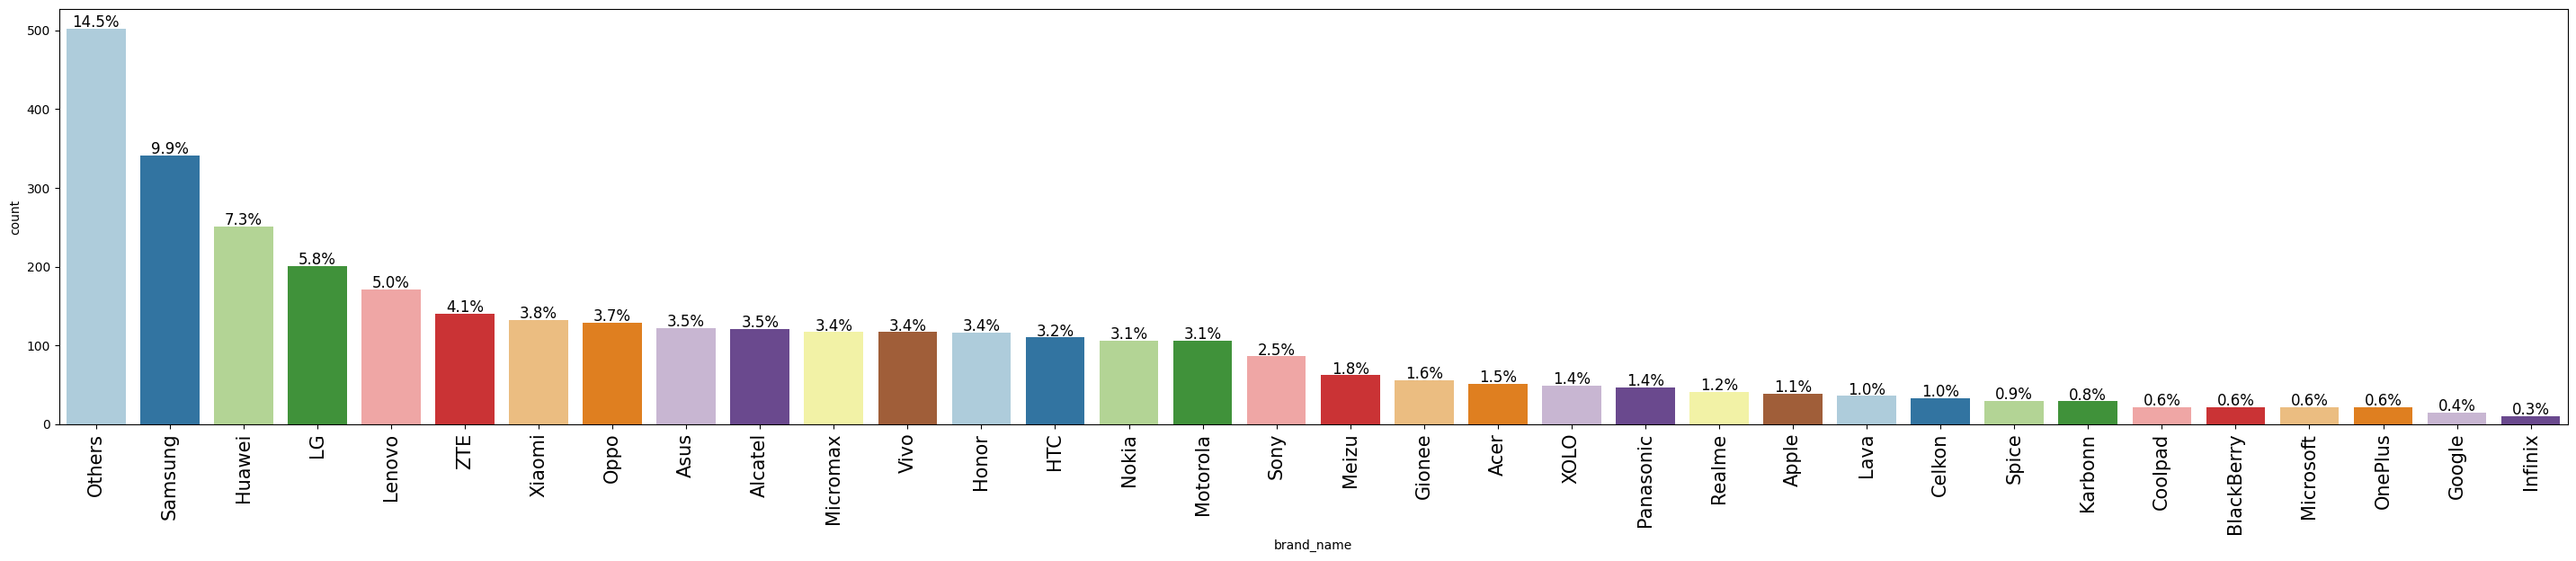

In [ ]:
labeled_barplot(data, "brand_name", perc=True)

In [ ]:
data['brand_name'].nunique()

34

####OS
- 93.1% of devices use Android Operating Sistem

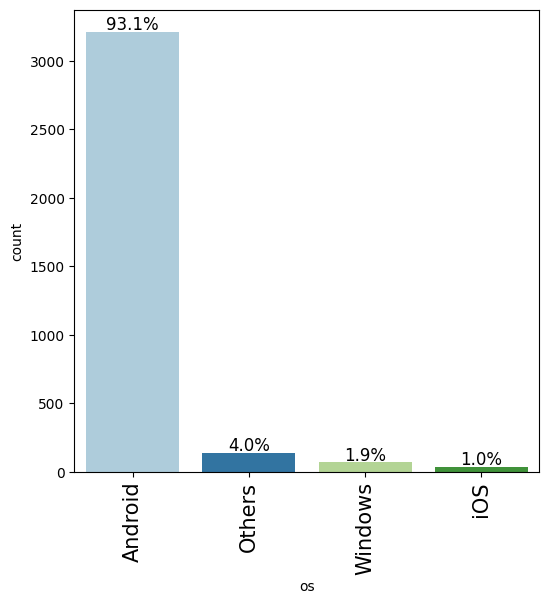

In [ ]:
labeled_barplot(data, "os", perc=True)

####4G
- 67.6% of devices in the dataset have 4G

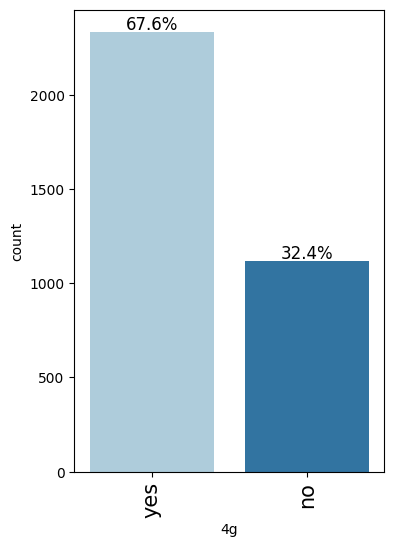

In [ ]:
labeled_barplot(data, "4g", perc=True)

####5G
- 4.4% of devices in the dataset have 5G

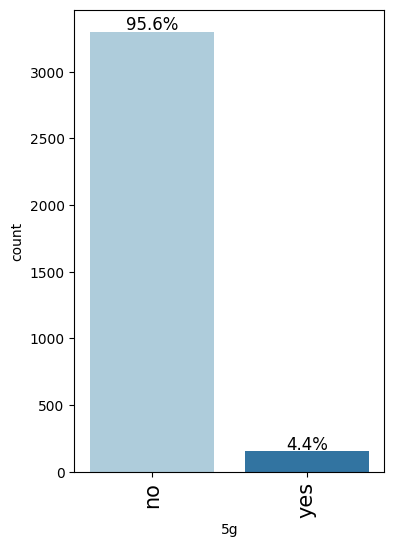

In [ ]:
labeled_barplot(data, "5g", perc=True)

### Bivariate Analysis

####Correlation Numerical Columns
Which attributes are highly correlated with the normalized price of a used device?

- The normalized used price is correlated with screen size, selfie camara, and battery.
- Normalized used price is higly correlated to normalized new price as expected.

Additional Observations
- Days used is higly correlated to the relase year, as expected.
- The battery, screen size and weight are highly correlated with each other.



In [ ]:
#creating al list of numerical columns
num_cols=data.select_dtypes(include=np.number).columns.tolist()

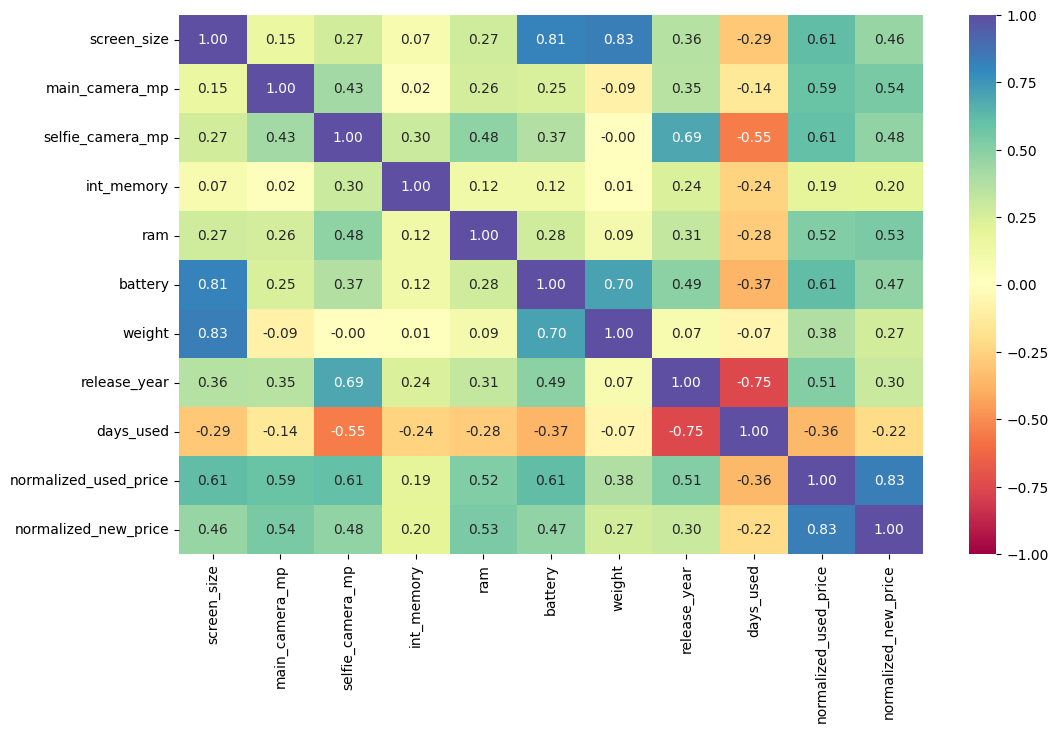

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1, fmt='.2f');
plt.show()

####RAM VS BRAND
The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
- Most brands only have 4 GB of Ram
- 8 brands have more RAM variation
- OnePlus has the highest RAM available in the market with 12GB
- Nokia and Celkon have devices with RAM close to 0 GB

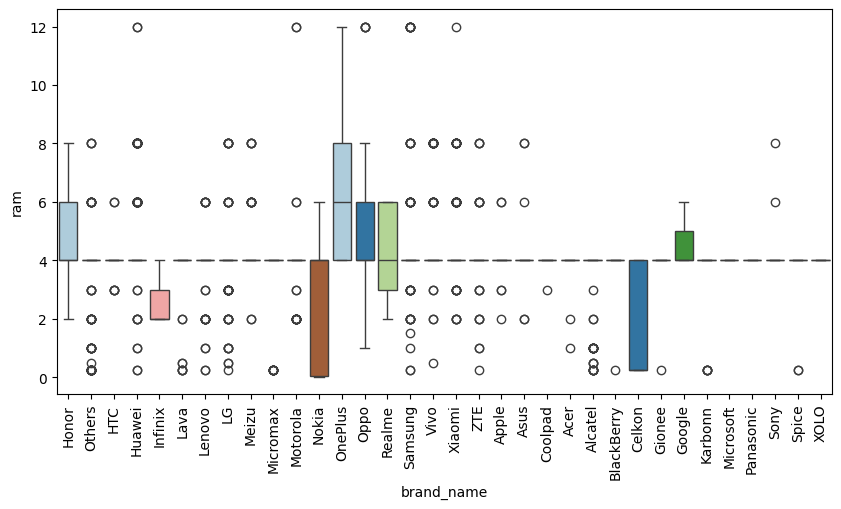

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='brand_name', y='ram', palette='Paired')
plt.xticks(rotation=90)
plt.show()

####Battery vs Weight
A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
- The weight of the device exhibits consistent variation, ranging from approximately 100 to 550 grams for batteries between 4500-6000 mAh. However, for batteries exceeding 6000 mAh, the device weight fluctuates between 400 and 8000 grams, with a few exceptions showing lighter weights.

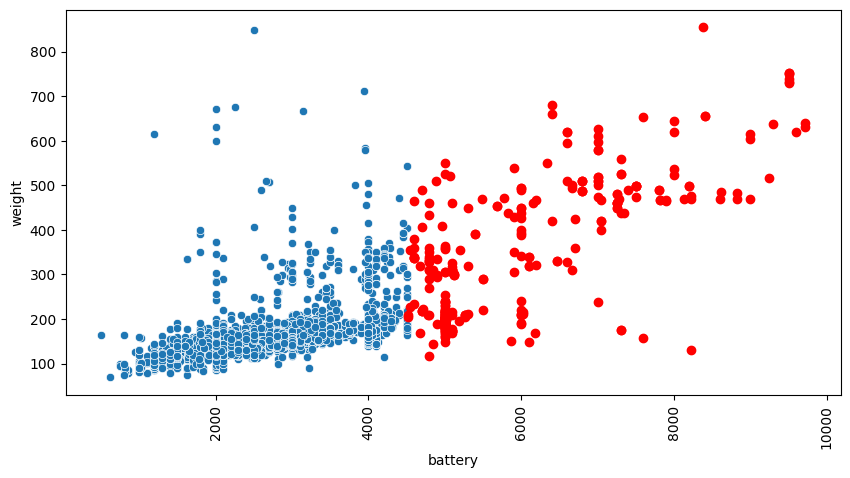

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='battery', y='weight')
plt.xticks(rotation=90)
for i in range(len(data)):
    if data['battery'][i] > 4500: # color the dots in red where devices have more than 4500 mAh
       plt.scatter(data['battery'][i], data['weight'][i], color="r")
plt.show()

####Big Screen Size
- Bigger screens are desirable for entertainment purposes as they offer a better viewing experience.
- Out of the 3454 devices in the data set, 3362 have screen size larger than 6 inches.

In [ ]:
data['screen_size'].count()

3454

In [ ]:
screensize_greater_than_6=data[data.screen_size > 6]
screensize_greater_than_6.shape

(3362, 15)

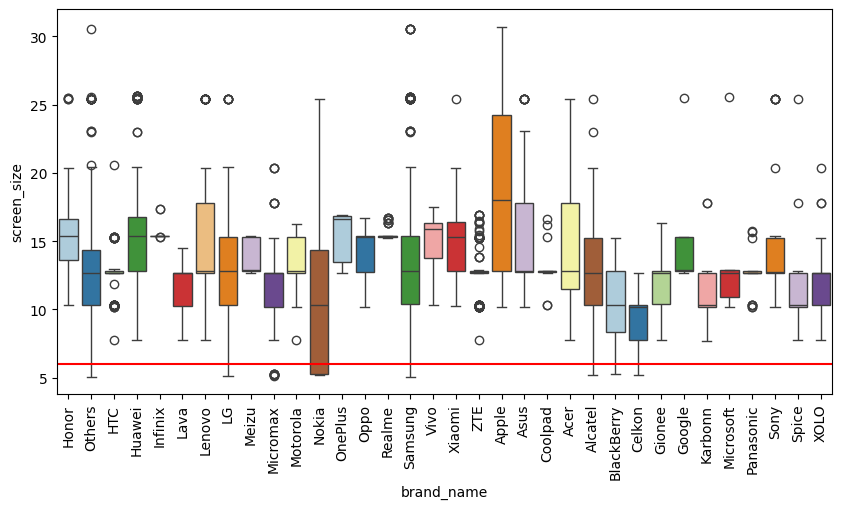

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='brand_name', y='screen_size', palette='Paired')
plt.xticks(rotation=90)
plt.axhline(y=6, c="r", linestyle='-') # draw a red horizontal line at y = 6
plt.show()

####Selfie Camara across brands
- A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones.
- Out of the 3454 devices on the dataset, 655 have resolution of the front camera greater than 8 megapixels
- Not all brands offer devices with resolution equal or higher than 8 mp.


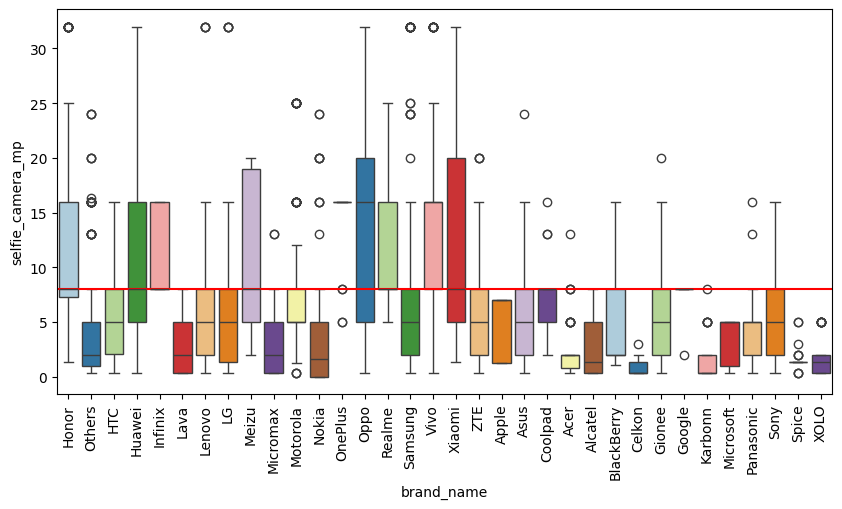

In [ ]:
#Plot showing the distribution of the devices front camera resolution in megapixels across brands with a line indicating 8 mp
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='brand_name', y='selfie_camera_mp', palette='Paired')
plt.xticks(rotation=90)
plt.axhline(y=8, c="r", linestyle='-') # draw a red horizontal line at y = 8
plt.show()

In [ ]:
selfiecamera_greater_than_8mp=data[data.selfie_camera_mp>8]
selfiecamera_greater_than_8mp.shape

(655, 15)

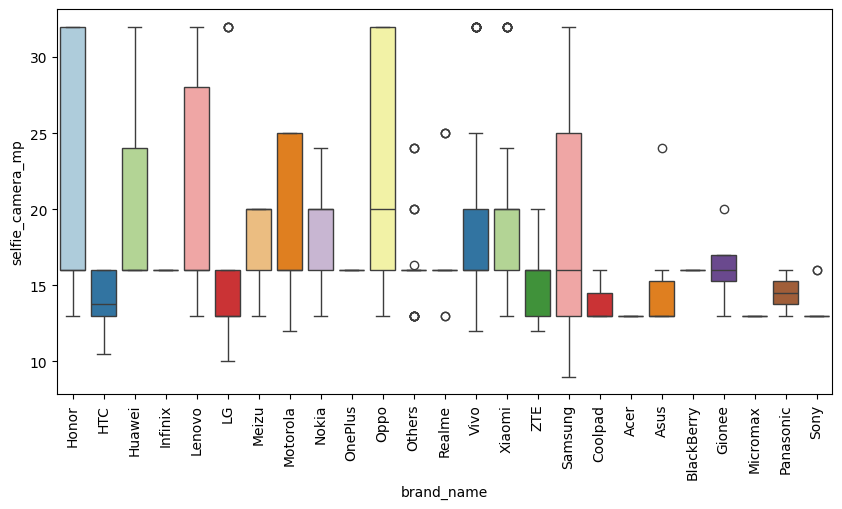

In [ ]:
#Plot showing the distribution of brands with devices having resolution greater than 8 megapixels on their front camera
plt.figure(figsize=(10,5))
sns.boxplot(data=selfiecamera_greater_than_8mp, x='brand_name', y='selfie_camera_mp', palette='Paired')
plt.xticks(rotation=90)
plt.show()

## Data Preprocessing

###Missing Value Treatment

Lets fix the missing values in the data
- For the variable Main_camara_mp, we will impute the missing values in each column with the median grouped by selfie camara and battery as both the columns have skewed distributions.
- For the variable selfie camara, we will impute the missing values in each column with the median grouped by weight.
- For the variable ram, battery and internal memory, we will impute the missing values in each column with the median grouped by main camera mp.
- For the variable weight, we will impute the missing values in each column with the median grouped by battery.


In [ ]:
df2=data.copy()

In [ ]:
df2.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
df2['main_camera_mp']=df2['main_camera_mp'].fillna(value=df2.groupby(['selfie_camera_mp','battery'])['main_camera_mp'].transform('median'))
df2['selfie_camera_mp']=df2['selfie_camera_mp'].fillna(value=df2.groupby(['weight'])['selfie_camera_mp'].transform('median'))

df2.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           46
selfie_camera_mp          0
int_memory                4
ram                       4
battery                   6
weight                    7
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
df2['ram']=df2['ram'].fillna(value=df2.groupby(['main_camera_mp'])['ram'].transform('median'))

df2.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           46
selfie_camera_mp          0
int_memory                4
ram                       0
battery                   6
weight                    7
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
df2['weight']=df2['weight'].fillna(value=df2.groupby(['battery'])['weight'].transform('median'))

df2.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           46
selfie_camera_mp          0
int_memory                4
ram                       0
battery                   6
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
df2['battery']=df2['battery'].fillna(value=df2.groupby(['main_camera_mp'])['battery'].transform('median'))
df2['int_memory']=df2['int_memory'].fillna(value=df2.groupby(['main_camera_mp'])['int_memory'].transform('median'))

df2.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           46
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
df2['main_camera_mp']=df2['main_camera_mp'].fillna(value=df2.groupby(['selfie_camera_mp'])['main_camera_mp'].transform('median'))

df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- All missing values have been treated

###Outlier Detection
- There are many outliers in the data
- However, we will not treat them as they are proper values

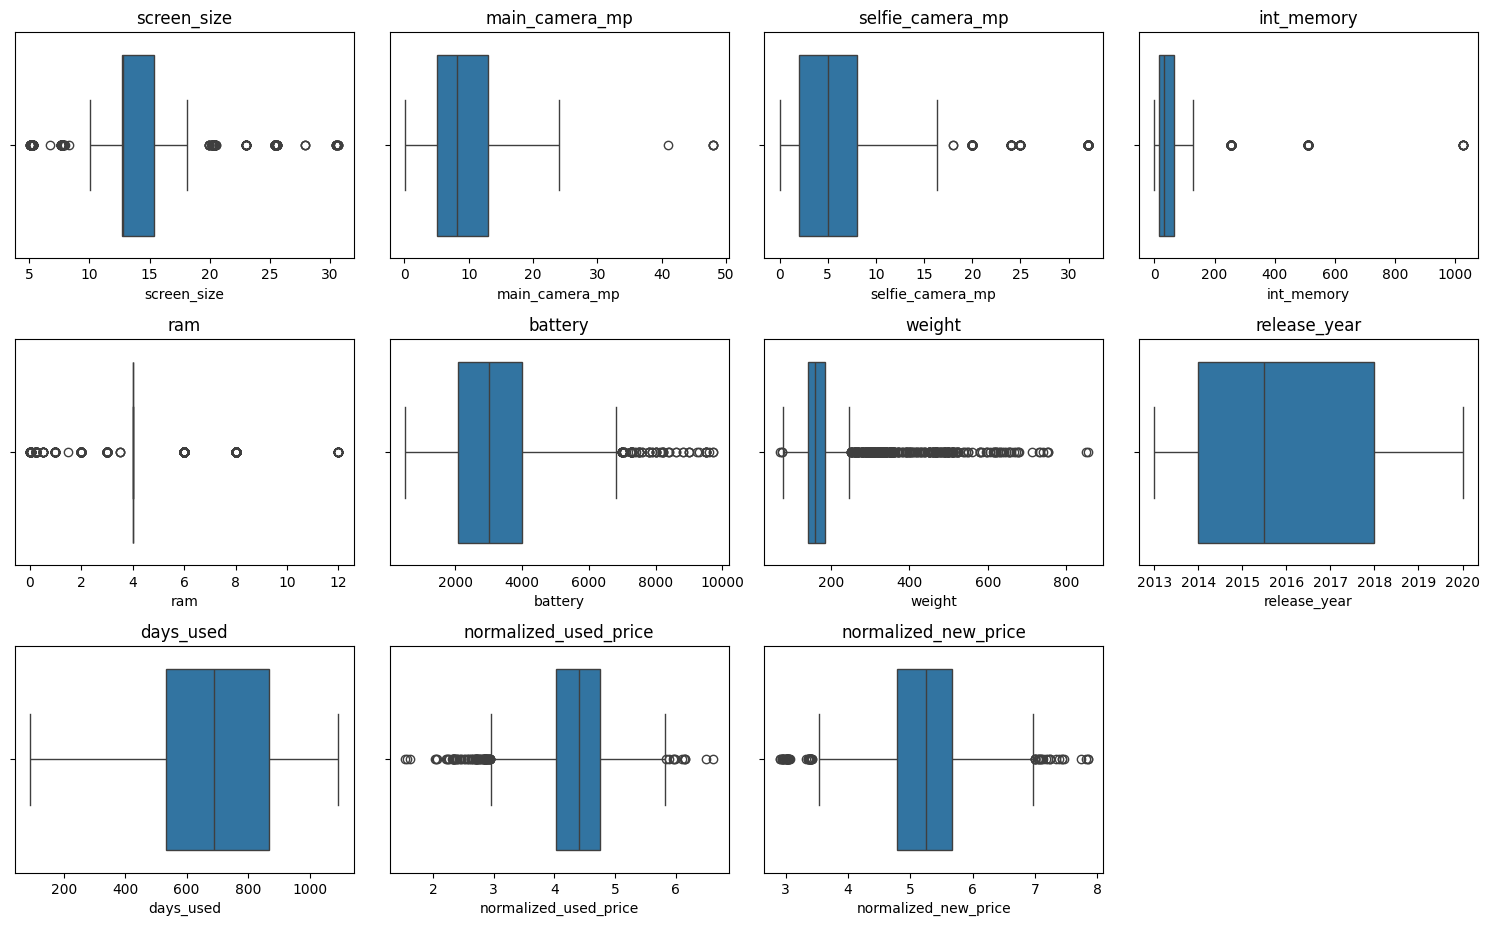

In [ ]:
#outlier detection using boxplot
num_cols=df2.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,12))
for i, variable in enumerate(num_cols):
  plt.subplot(4,4, i + 1)
  sns.boxplot(data=df2, x=variable)
  plt.tight_layout()
  plt.title(variable)

plt.show()

In [ ]:
#find the % of outliers in each column of the data, using IQR
Q1=df2[num_cols].quantile(0.25)
Q3=df2[num_cols].quantile(0.75)
IQR= Q3-Q1

lower_wisker=Q1-1.15*IQR
upper_wisker=Q3+1.5*IQR

((df2[num_cols]<lower_wisker) | (df2[num_cols]>upper_wisker)).sum()/df2.shape[0]*100


screen_size              13.028373
main_camera_mp            0.144760
selfie_camera_mp          6.398379
int_memory                3.995368
ram                      18.471338
battery                   2.229299
weight                   12.101911
release_year              0.000000
days_used                 1.447597
normalized_used_price     4.082224
normalized_new_price      2.837290
dtype: float64

###Data Preparation for Modeling
- We want to predict the price of a used phone/tablet
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.
- We will build a Linear Regression model using the train data and then check its performance

In [ ]:
#defining X and Y variables
x=df2.drop(['normalized_used_price'], axis=1)
y=df2['normalized_used_price']

print(x.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_new_price  
0        127              4.715100  
1        325              5.519018  
2        162              5.884631  
3        345              5.630961  
4  

In [ ]:
#Lets add the intercept to data
x=sm.add_constant(x)

In [ ]:
#creating dummy variables
x=pd.get_dummies(x, columns=x.select_dtypes(include=['object', 'category']).columns.tolist(),drop_first=True)
x.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
print('The number of rows in the train data =',x_train.shape[0])
print('The number of rows in the test data =',x_test.shape[0])

The number of rows in the train data = 2417
The number of rows in the test data = 1037


## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.4
Date:                   Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                           16:49:56   Log-Likelihood:                 122.65
No. Observations:                   2417   AIC:                            -147.3
Df Residuals:                       2368   BIC:                             136.4
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


###Interpreting the Regression Results
- Adjusted R-squared: It reflects the fit of the model.
    - Adjusted R-squared valeus generally range from 0 to 1, where a higher value generally indicates a better fit. assuming certain conditions are met.
    - In this case, the value for adj. R-squared is **0.842**, wich is really good.
- const coefficient: it is the Y-intercept
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.
    - In our case, the value for const coefficient is **-45.2899**
- Coefficient of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of screen size is **0.0244**

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable

    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_lr_metrics = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_lr_metrics

In [ ]:
#checking model performance on train set
print('Training Performance')
olsmodel_train_perf=model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229999,0.180385,0.844731,0.841517,4.328796


In [ ]:
#checking model performance on test set
print('Test Performance')
olsmodel_test_perf=model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238757,0.185006,0.841952,0.834105,4.508854


**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict anime ratings within a mean error of 0.18 on the test data

- MAPE of 4.51 on the test data means that we are able to predict within 4.51% of the prices for used phone/tablet

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

###Test for Multicollinearity

In [ ]:
#lets define a function to check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
  vif = pd.DataFrame()
  vif['feature'] = predictors.columns

  #calculating VIF for each feature
  vif['VIF'] = [variance_inflation_factor(predictors.values,i) for i in range(len(predictors.columns))]

  return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,3.795038e+06
1,screen_size,7.683270e+00
2,main_camera_mp,2.297879e+00
3,selfie_camera_mp,2.805494e+00
4,int_memory,1.364942e+00
5,ram,2.262413e+00
6,battery,4.064481e+00
7,weight,6.390267e+00
8,release_year,4.903336e+00
9,days_used,2.659510e+00


* There are multiple columns with high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

**Removing Multicollinearity**

To remove multicollinearity we will create a function that will perform the following:

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till we get all VIF scores under 5.

In [ ]:
#creating a function to eliminate multicollinearity
def treating_multicollinearity(predictors, target, high_vif_columns):

    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF (>5)
    """

    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ['screen_size', 'weight']

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838221,0.234819
1,weight,0.837914,0.235042


In [ ]:
col_to_drop = 'screen_size'
x_train2=x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2=x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

#check VIF
vif = checking_vif(x_train2)
print('VIF after dropping', col_to_drop)
vif

VIF after dropping screen_size


,feature,VIF
0,const,3.668884e+06
1,main_camera_mp,2.294937e+00
2,selfie_camera_mp,2.801933e+00
3,int_memory,1.362855e+00
4,ram,2.262411e+00
5,battery,3.826508e+00
6,weight,2.983191e+00
7,release_year,4.736116e+00
8,days_used,2.648002e+00
9,normalized_new_price,3.103747e+00


- We have dealt with multicollinearity in the data
- We will now rebuild the model using the updated set of predictors variables

In [ ]:
olsmod1= sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.3
Date:                   Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                           16:49:58   Log-Likelihood:                 96.756
No. Observations:                   2417   AIC:                            -97.51
Df Residuals:                       2369   BIC:                             180.4
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**
- We can see that adj. R-squared has dropped from 0.842 to 0.838, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

####**Dealing with high p-value variables**

- Some of the variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'normalized_new_price', 'brand_name_Karbonn', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [ ]:
#creating new train and test datasets with variables with p-value < 0.05
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
#creating the new linear regression model
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1135.
Date:                   Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                           16:49:59   Log-Likelihood:                 74.956
No. Observations:                   2417   AIC:                            -125.9
Df Residuals:                       2405   BIC:                            -56.43
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#checking model performance on train set
print('Training Performance')
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234582,0.183601,0.838481,0.837675,4.416858


In [ ]:
#checking model performance on test set
print('Test Performance')
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241763,0.18667,0.837947,0.836048,4.561626


####Observations
- Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and olsmod2 as the final model
- Our model is able to explain ~84% of the variance since it has ann adj.R-squared of 0.8377
- The variables we dropped did not affect our model since model olsmod1 had an adj. R-squared of 0.838
- RMSE and MAE values are comparable for train and test sets, which indicates that the model is not overfitting

###Test for Linearity and Independence

In [ ]:
#we are going to create a dataframe with actual, fitted and residual values
df_new = pd.DataFrame()

df_new['Actual Values']= y_train #Actual values
df_new['Fitted Values']= olsmod2.fittedvalues #predicted values
df_new['Residuals'] = olsmod2.resid #residuals

df_new.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.864510,0.222978
1525,4.448399,4.593905,-0.145506
1128,4.315353,4.284343,0.031010
3003,4.282068,4.252999,0.029069
2907,4.456438,4.490532,-0.034094


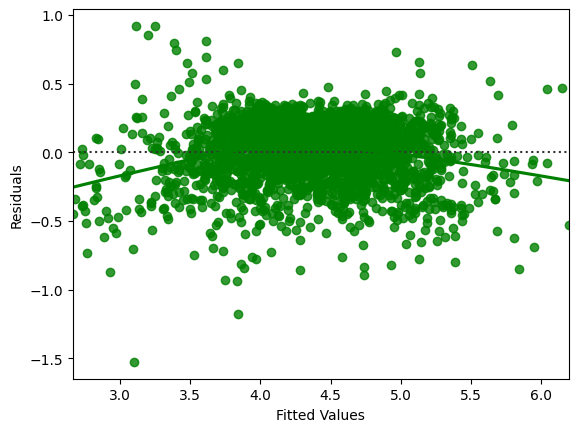

In [ ]:
#Lets plot the fitted values vs residuals to see if we find any patters indicated non linearity and independence
sns.residplot(data=df_new, x='Fitted Values', y='Residuals', color='green', lowess=True)
plt.show()

- We see no pattern in the plot. Therefore, the assumptions of linearity and independence are satisfied

###Test for Normality

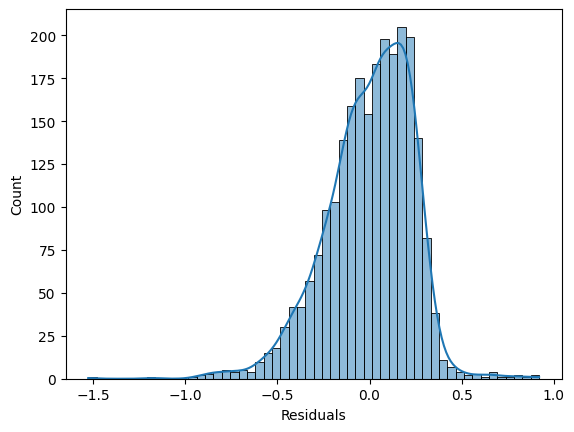

In [ ]:
#Creating a plot of the residuals to check for normality distribution
sns.histplot(data=df_new, x='Residuals', kde=True)
plt.show()

- The residuals histogram closely resembles a normal distribution, with a slight skew towards the right side.
- Let's check the Q-Q plot.

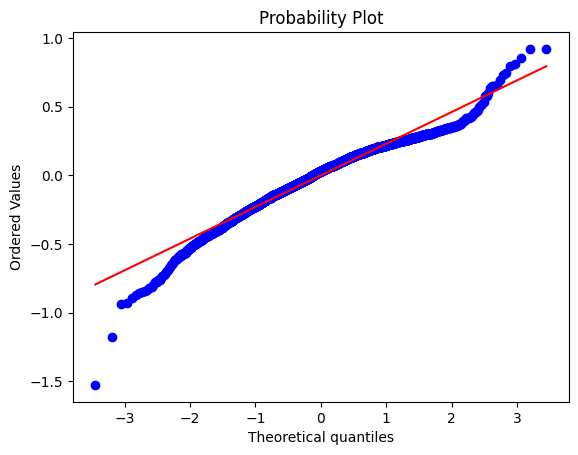

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot (df_new['Residuals'], dist='norm', plot=pylab)
plt.show()


- The residuals more or less follow a straight line except for the tails. More so on the right side tail.
- Let's check the Shapiro-Wilk test.

In [ ]:
#Lets check the Shapiro-Wilk test
stats.shapiro(df_new['Residuals'])

ShapiroResult(statistic=0.9664280414581299, pvalue=2.6259898424697404e-23)

- The residuals are not normal since the p-value < 0.05, according to the Shapiro-Wilks test.
- However, as an approximation, we will accept this distribution as close to being normal and the assumption is satisfied.

###Test for Homoscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name =  ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(df_new['Residuals'], x_train3)
lzip(name, test)

[('F statistic', 1.018438397832835), ('p-value', 0.37602697217726033)]

- The p-value > 0.05 therefore, we can say that the residuals are homoscedastic. So, the assumption is satisfied.


## Final Model

In [ ]:
#Checking for predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.384063
2341,3.696103,4.000412
1913,3.592093,3.644293
688,4.306495,4.099273
650,4.522115,5.175955
2291,4.259294,4.394017
40,4.997685,5.433908
1884,3.875359,4.046450
2538,4.206631,4.061327
45,5.380450,5.268767


In [ ]:
#lets create the final model and view summary to gain insights.
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmod_final = sm.OLS(y_train, x_train_final).fit()
print(olsmod_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1135.
Date:                   Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                           16:50:01   Log-Likelihood:                 74.956
No. Observations:                   2417   AIC:                            -125.9
Df Residuals:                       2405   BIC:                            -56.43
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Checking model performance
print('Training Performance')
olsmod_final_train_perf = model_performance_regression(olsmod_final, x_train_final, y_train)
olsmod_final_train_perf

Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234582,0.183601,0.838481,0.837675,4.416858


In [ ]:
#Checking model performance
print('Test Performance')
olsmod_final_test_perf = model_performance_regression(olsmod_final, x_test_final, y_test)
olsmod_final_test_perf

Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241763,0.18667,0.837947,0.836048,4.561626


- The model can explain ~84% of the variation in the data.
- The model is not overfitting since the train and test RMSE and MAE are low and comparable.
- The MAPE on the test data suggests that we can predict within 4.56% of the price for used phones/tablets.
- Therefore, we can conclude that olsmod_final is a good model for prediction as well as inferencfe purposes.

## Actionable Insights and Recommendations

- The model is able to explain ~84% of the variation in the data and within 4.6% of the price for used phones/tablets on the test data, which indicates that the model is good for prediction as well as inference purposes
- If the resolution in megapixels in the main camera increases by one unit, then the used price increases by 0.0218 units, all other variables held constant
- If the resolution in megapixels in the selfie camera increases by one unit, then the used price increases by 0.0143 units, all other variables held constant
- If the normalized price for the device increases by one unit, then the used price increases by 0.43 units, all other variables held constant
- If the amount of RAM in GB increases by one unit, then the used price increases by 0.43 units, all other variables held constant
- If the release year increases by one unit, then the used price increases by 0.0268 units, all other variables held constant
- The used devices from the brand Sony will be 0.0636 units less than other brands
- More now than ever people use their phones to take photos and videos for their personal and professional use. Having better resolution for their front (selfie) and main cameras increase the price and appeal for customers. The company should look into brands that are offering devices with good resolution cameras.
- Customers want to rely on their device's battery to last the most possible. We saw from the EDA that as you increase the capacity of the battery, the device tends to increase in weight. The model shows that if the weight increases by one unit, then the used price increases by 0.0017.
- Storage is also a considering factor when deciding to purchase a device. The company should look into that variable as well for better predicting price of used devices.

___